In [114]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

In [115]:
X = pd.read_excel(r"C:\\Users\\Klaw\\Desktop\\internship sparks foundation\\Task2\\Iris.xlsx", sheet_name='Feuil1')

In [116]:
k_range = range(2,9)

In [117]:
silhouette_scores = []

In [118]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [119]:
encoded_data = encoder.fit_transform(X['Species'])
X['Species'] = encoded_data

In [120]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

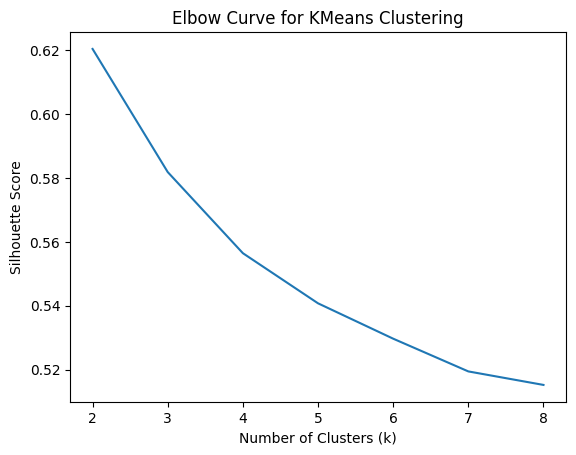

In [121]:
plt.plot(k_range, silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Elbow Curve for KMeans Clustering")
plt.show()

In [122]:
optimal_index = silhouette_scores.index(max(silhouette_scores))
optimal_k = k_range[optimal_index]

In [123]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [124]:
y_pred = kmeans.fit_predict(X)

In [ ]:
X = X.to_numpy()

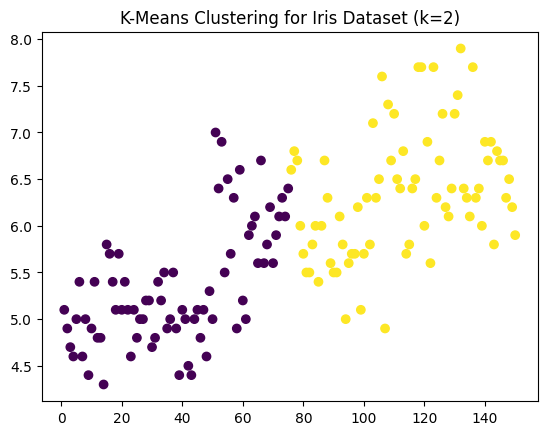

In [126]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title(f'K-Means Clustering for Iris Dataset (k={optimal_k})')
plt.show()